# Data sonar from wencam

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('G:/TM/Transverse Projects/python/random_forest/DATA')

In [2]:
sonar = pd.read_csv('sonar.txt', sep='\t')

In [3]:
sonar.shape

(208, 61)

In [4]:
sonar.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [58]:
X=sonar.iloc[:,:-1]  # Features
y = sonar['Class'] # Labels

## partition of train and test

In [26]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## base fit with default parameters: model_rf

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [28]:
model_rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evalution of fit quality

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred=model_rf.predict(X_test)
print("Accuracy on the testing set:",metrics.accuracy_score(y_test, y_pred))
y_pred_train=model_rf.predict(X_train)
print("Accuracy on the training set:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy on the testing set: 0.7619047619047619
Accuracy on the training set: 0.993103448275862


In [30]:
cross_table = pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])
model_rf_precision_recall=pd.DataFrame(index=['Precision', 'Recall','F1 score'], columns=['M','R'])

In [31]:
cross_table

Predicted Result,M,R
Actual Result,,
M,26,3
R,12,22


* definition of **F1 score**:

$F1 score = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$

In [98]:
# precision calculation
model_rf_precision_recall.loc['Precision','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['R','M'])*100
model_rf_precision_recall.loc['Precision','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['M','R'])*100
model_rf_precision_recall.loc['Precision','average'] = (model_rf_precision_recall.loc['Precision','M']+model_rf_precision_recall.loc['Precision','R'])/2

# recall calculation
model_rf_precision_recall.loc['Recall','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['M','R'])*100
model_rf_precision_recall.loc['Recall','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['R','M'])*100
model_rf_precision_recall.loc['Recall','average'] = (model_rf_precision_recall.loc['Recall','M']+model_rf_precision_recall.loc['Recall','R'])/2

# F1 score calculation
model_rf_precision_recall.loc['F1 score','M'] = 2/(1/model_rf_precision_recall.loc['Precision','M']+1/model_rf_precision_recall.loc['Recall','M'])
model_rf_precision_recall.loc['F1 score','R'] = 2/(1/model_rf_precision_recall.loc['Precision','R']+1/model_rf_precision_recall.loc['Recall','R'])
model_rf_precision_recall.loc['F1 score','average'] = (model_rf_precision_recall.loc['F1 score','M']+model_rf_precision_recall.loc['F1 score','R'])/2



In [99]:
model_rf_precision_recall

,M,R,average
Precision,68.4211,88,78.210526
Recall,89.6552,64.7059,77.180527
F1 score,77.6119,74.5763,76.094106


### with automatic calculation

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[26  3]
 [12 22]]
              precision    recall  f1-score   support

           M       0.68      0.90      0.78        29
           R       0.88      0.65      0.75        34

   micro avg       0.76      0.76      0.76        63
   macro avg       0.78      0.77      0.76        63
weighted avg       0.79      0.76      0.76        63

0.7619047619047619


## Random Hyperparameter Grid : RandomizedSearchCV: random_rf

In [101]:
# Number of trees in random forest: OK
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split: OK
max_features = ['sqrt', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [165]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [166]:
# Fit the random search model
rf_random.fit(X_train, y_train)
# best parameters
### default model :

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2'}

In [167]:
# best estimator 
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
# difference between the 2 ??
# random_rf = RandomForestClassifier(rf_random.best_estimator_)
random_rf = rf_random.best_estimator_

In [168]:
# random forest model with best parameters
random_rf = rf_random.best_estimator_
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_rf.get_params())
random_rf.fit(X_train,y_train)

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evalution of fit quality

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred=random_rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred_train=random_rf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.8095238095238095
Accuracy: 1.0


In [170]:
cross_table = pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])
random_rf_precision_recall = pd.DataFrame(index=['Precision', 'Recall','F1 score'], columns=['M','R'])

In [171]:
cross_table

Predicted Result,M,R
Actual Result,,
M,28,1
R,11,23


In [172]:
# precision calculation
random_rf_precision_recall.loc['Precision','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['R','M'])*100
random_rf_precision_recall.loc['Precision','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['M','R'])*100
random_rf_precision_recall.loc['Precision','average'] = (random_rf_precision_recall.loc['Precision','M']+random_rf_precision_recall.loc['Precision','R'])/2

# recall calculation
random_rf_precision_recall.loc['Recall','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['M','R'])*100
random_rf_precision_recall.loc['Recall','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['R','M'])*100
random_rf_precision_recall.loc['Recall','average'] = (random_rf_precision_recall.loc['Recall','M']+random_rf_precision_recall.loc['Recall','R'])/2

# F1 score calculation
random_rf_precision_recall.loc['F1 score','M'] = 2/(1/random_rf_precision_recall.loc['Precision','M']+1/random_rf_precision_recall.loc['Recall','M'])
random_rf_precision_recall.loc['F1 score','R'] = 2/(1/random_rf_precision_recall.loc['Precision','R']+1/random_rf_precision_recall.loc['Recall','R'])
random_rf_precision_recall.loc['F1 score','average'] = (random_rf_precision_recall.loc['F1 score','M']+random_rf_precision_recall.loc['F1 score','R'])/2



In [173]:
random_rf_precision_recall

,M,R,average
Precision,71.7949,95.8333,83.814103
Recall,96.5517,67.6471,82.099391
F1 score,82.3529,79.3103,80.831643


## Grid Search with Cross Validation : grid_rf

In [146]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 110, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 200, 300, 1000, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [147]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [148]:
# random forest model with best parameters
grid_rf = grid_search.best_estimator_
grid_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
# random forest model with best parameters
# grid_rf = RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features= 'log2', max_depth= 100,bootstrap= False)
grid_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evalution of fit quality

In [150]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred=grid_rf.predict(X_test)
print("Accuracy on testing set:",metrics.accuracy_score(y_test, y_pred))
y_pred_train=grid_rf.predict(X_train)
print("Accuracy on training set:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy on testing set: 0.873015873015873
Accuracy on training set: 1.0


In [151]:
cross_table = pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])
grid_rf_precision_recall=pd.DataFrame(index=['Precision', 'Recall','F1 score'], columns=['M','R'])

In [152]:
# precision calculation
grid_rf_precision_recall.loc['Precision','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['R','M'])*100
grid_rf_precision_recall.loc['Precision','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['M','R'])*100
grid_rf_precision_recall.loc['Precision','average'] = (grid_rf_precision_recall.loc['Precision','M']+grid_rf_precision_recall.loc['Precision','R'])/2

# recall calculation
grid_rf_precision_recall.loc['Recall','M'] = cross_table.loc['M','M']/(cross_table.loc['M','M']+cross_table.loc['M','R'])*100
grid_rf_precision_recall.loc['Recall','R'] = cross_table.loc['R','R']/(cross_table.loc['R','R']+cross_table.loc['R','M'])*100
grid_rf_precision_recall.loc['Recall','average'] = (grid_rf_precision_recall.loc['Recall','M']+grid_rf_precision_recall.loc['Recall','R'])/2

# F1 score calculation
grid_rf_precision_recall.loc['F1 score','M'] = 2/(1/grid_rf_precision_recall.loc['Precision','M']+1/grid_rf_precision_recall.loc['Recall','M'])
grid_rf_precision_recall.loc['F1 score','R'] = 2/(1/grid_rf_precision_recall.loc['Precision','R']+1/grid_rf_precision_recall.loc['Recall','R'])
grid_rf_precision_recall.loc['F1 score','average'] = (grid_rf_precision_recall.loc['F1 score','M']+grid_rf_precision_recall.loc['F1 score','R'])/2



In [153]:
grid_rf_precision_recall

,M,R,average
Precision,80,96.4286,88.214286
Recall,96.5517,79.4118,87.981744
F1 score,87.5,87.0968,87.298387


## parameters importance for the 3 optimized models

### default model :

In [176]:
pprint(model_rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


No handles with labels found to put in legend.


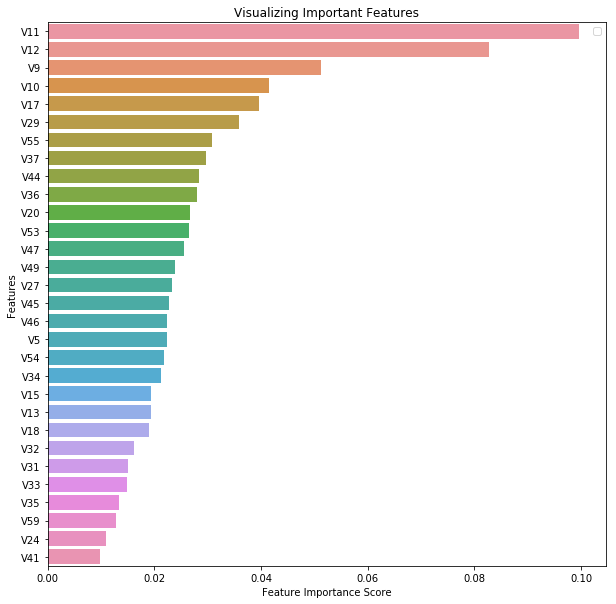

In [154]:
#  model with all data
model_rf.fit(X,y)
# importance of features: first 30
feature_imp = pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
first_30 = feature_imp.iloc[:30]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
figure=plt.figure(figsize=(10,10))
sns.barplot(x=first_30, y=first_30.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### random model :

In [177]:
pprint(random_rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


No handles with labels found to put in legend.


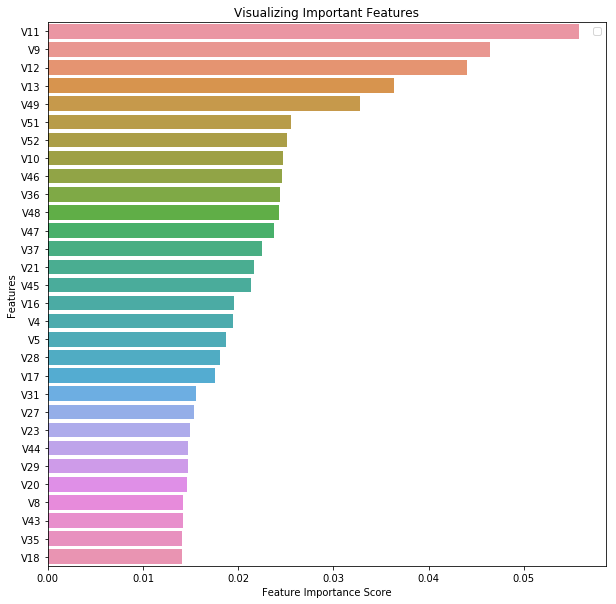

In [175]:
#  model with all data
random_rf.fit(X,y)
# importance of features
feature_imp = pd.Series(random_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
first_30 = feature_imp.iloc[:30]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
figure=plt.figure(figsize=(10,10))
sns.barplot(x=first_30, y=first_30.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### grid model :

In [178]:
pprint(grid_rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


No handles with labels found to put in legend.


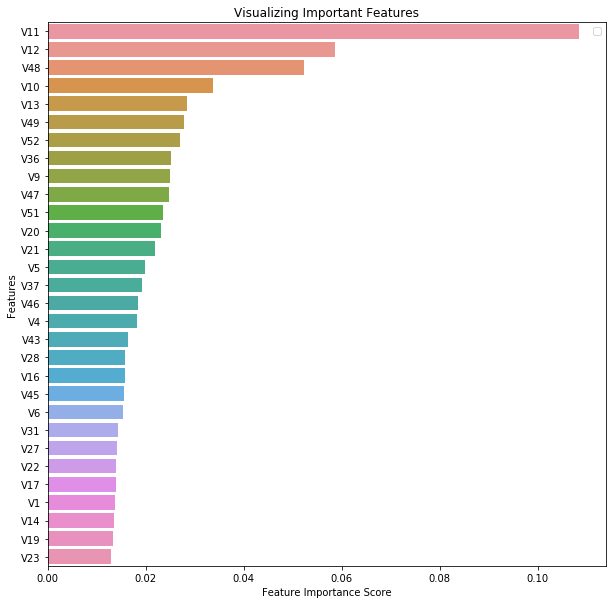

In [156]:
#  model with all data
grid_rf.fit(X,y)
# importance of features: first 30
feature_imp = pd.Series(grid_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
first_30 = feature_imp.iloc[:30]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
figure=plt.figure(figsize=(10,10))
sns.barplot(x=first_30, y=first_30.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## impact of trees nb. on accuracy

In [7]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [59]:
X=sonar.iloc[:,:-1]  # Features
y = sonar['Class'] # Labels

In [60]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [80]:
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

In [81]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably me

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably me

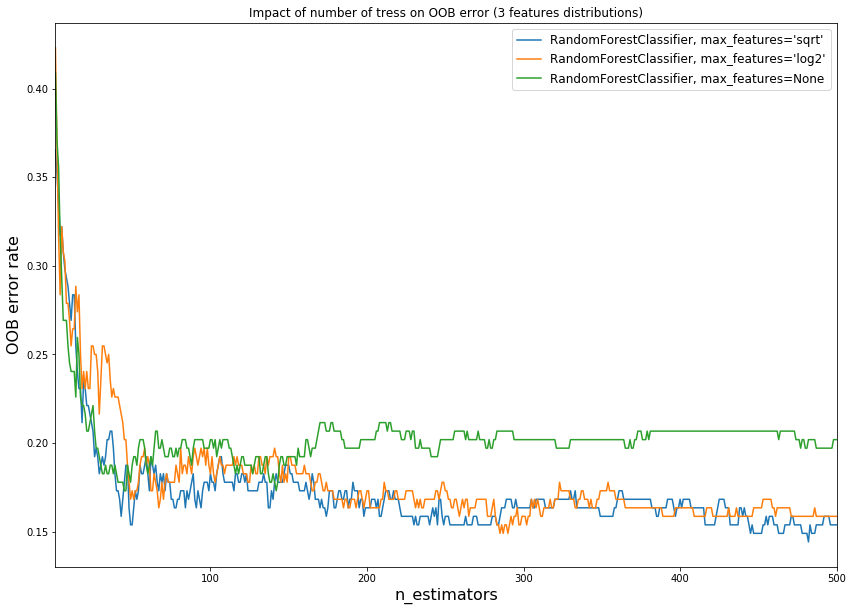

In [97]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(14,10))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.title('Impact of number of tress on OOB error (3 features distributions)')
plt.xlabel("n_estimators", size=16)
plt.ylabel("OOB error rate",size=16)
plt.legend(loc="upper right",fontsize = 'large')
plt.show()